# UV Visible Spectroscopy Experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
import scipy.constants as const
from numpy import polyfit

In [2]:
c = const.c
h = const.Planck
e = const.elementary_charge
h, c, e

(6.62607015e-34, 299792458.0, 1.602176634e-19)

In [3]:
def linfit(x, a, b):
    return a*x + b

In [4]:
lam_p, Eg_1, = [], []
slope2, intercept2, Eg_2 = [], [], []
c1err, c2err = [], []

### 25 75

,WL(nm),Abs,T%
0,190,2.7398,0.18
1,191,2.8062,0.16
2,192,3.3027,0.05
3,193,2.8691,0.14
4,194,3.0751,0.08


min: 430 and max: 464

slope=-0.055355350245471356 and intercept=27.355412988297125


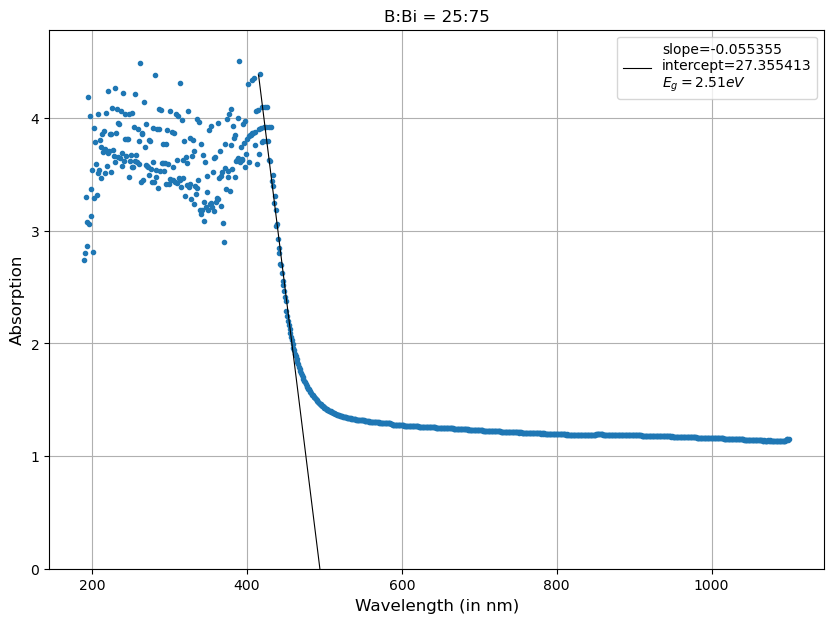

In [5]:
df = pd.read_excel('UV.xlsx', sheet_name='2575')
display(df.head())
x2575 = df['WL(nm)'].to_numpy()
y2575 = df['Abs'].to_numpy()
i1, i2 = 240, 275
xp, yp = x2575[i1:i2], y2575[i1:i2]

popt, pcov = curve_fit(linfit, xp, yp, p0=[0.05, 10])
xp1 = np.linspace(xp.min()-15, xp.max()+50, 50)
yfit = popt[0]*xp1 + popt[1]
lam = abs(popt[1]/popt[0])/(1e9)
Egdirect = h*c/(lam*e)
lam_p.append(lam), Eg_1.append(Egdirect)
print(f'min: {xp.min()} and max: {xp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')

plt.figure(figsize=(10,7))
plt.plot(x2575, y2575, 'o', ms=3)
plt.plot(xp1, yfit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={Egdirect:.3}eV$')
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.title('B:Bi = 25:75')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('2575', dpi=300)
plt.show()

min: 2.672073242094833 and max: 2.8833534519348896

slope=344861777.04867053 and intercept=-910652295.5502422
Eg = 2.640629829561312 eV


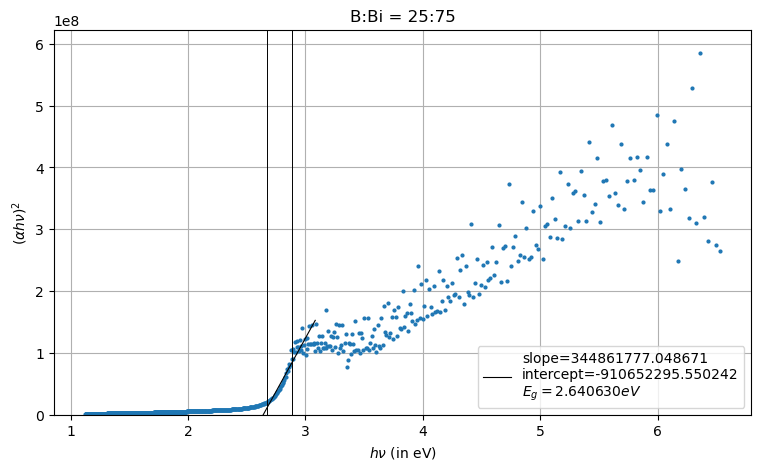

In [6]:
xt = 1.1e-3
ahv = (y2575*h*c/(xt*x2575*1e-9*e))**(2)
hv = h*c/(x2575*1e-9*e)
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
plt.title('B:Bi = 25:75')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
slope2.append(popt[0]), intercept2.append(popt[1]), Eg_2.append(abs(popt[1]/popt[0]))
c1err.append(pcov[1][1]), c2err.append(pcov[0][0])
vp1 = np.linspace(vp.min()-5e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('2575p', dpi=300)
plt.show()

### 45 55

,WL(nm),Abs,T%
0,190,4.4529,0.00
1,191,3.2693,0.05
2,192,3.4261,0.04
3,193,3.1104,0.08
4,194,4.1156,0.01


min: 402 and max: 429

slope=-0.0681608374074669 and intercept=31.50350294280249


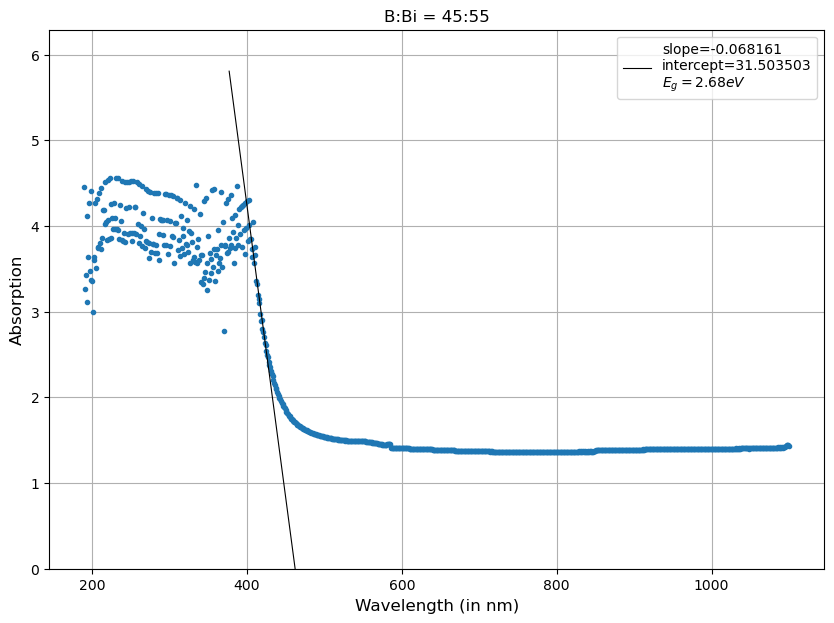

In [7]:
df = pd.read_excel('UV.xlsx', sheet_name='4555')
display(df.head())
x4555 = df['WL(nm)'].to_numpy()
y4555 = df['Abs'].to_numpy()
i1, i2 = 212, 240
xp, yp = x4555[i1:i2], y4555[i1:i2]

popt, pcov = curve_fit(linfit, xp, yp, p0=[0.05, 10])
xp1 = np.linspace(xp.min()-25, xp.max()+90, 50)
yfit = popt[0]*xp1 + popt[1]
lam = abs(popt[1]/popt[0])/(1e9)
Egdirect = h*c/(lam*e)
lam_p.append(lam), Eg_1.append(Egdirect)
print(f'min: {xp.min()} and max: {xp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')

plt.figure(figsize=(10,7))
plt.plot(x4555, y4555, 'o', ms=3)
plt.plot(xp1, yfit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={Egdirect:.3}eV$')
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.title('B:Bi = 45:55')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('4555', dpi=300)
plt.show()

min: 2.890074555552453 and max: 3.084184040626872

slope=505550028.2176119 and intercept=-1431146669.9604359
Eg = 2.830870517416735 eV


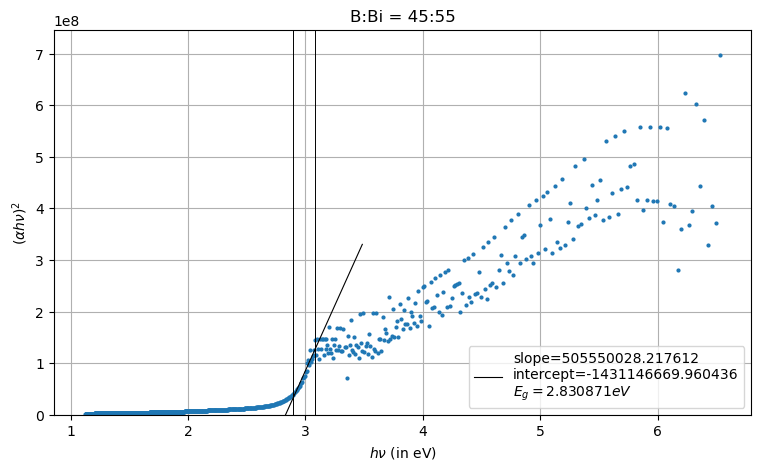

In [8]:
xt - 1.17e-3
ahv = (y4555*h*c/(xt*x4555*1e-9*e))**(2)
hv = h*c/(x4555*1e-9*e)
i1, i2 = 212, 240
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
plt.title('B:Bi = 45:55')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e7, -1e8])
slope2.append(popt[0]), intercept2.append(popt[1]), Eg_2.append(abs(popt[1]/popt[0]))
c1err.append(pcov[1][1]), c2err.append(pcov[0][0])
vp1 = np.linspace(vp.min()-6e-1, vp.max()+4e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('4555p', dpi=300)
plt.show()

### 60 40

,WL(nm),Abs,T%
0,190,3.1105,0.08
1,191,3.0262,0.09
2,192,3.9032,0.01
3,193,2.9721,0.11
4,194,3.2406,0.06


min: 380 and max: 404

slope=-0.0700246931322875 and intercept=29.8094317078567


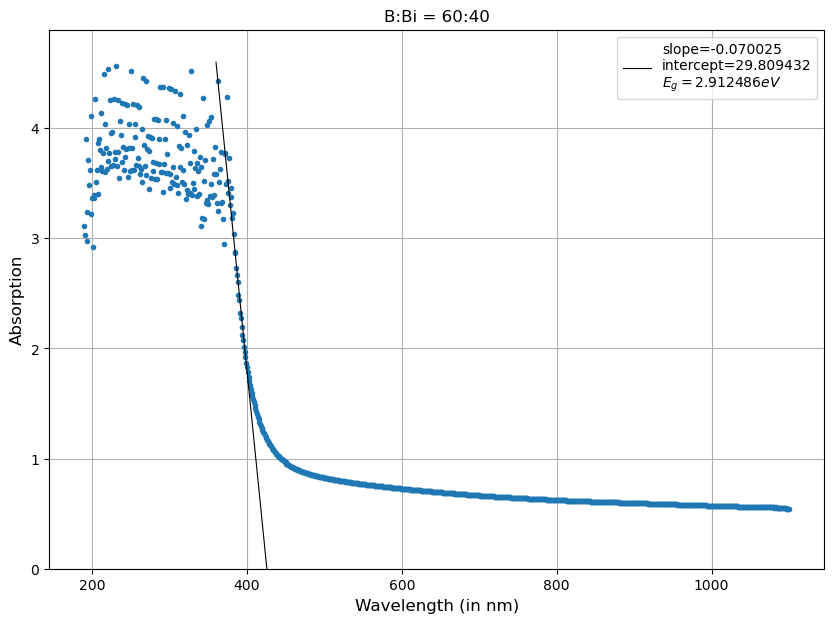

In [9]:
df = pd.read_excel('UV.xlsx', sheet_name='6040')
display(df.head())
x6040 = df['WL(nm)'].to_numpy()
y6040 = df['Abs'].to_numpy()
i1, i2 = 190, 215
xp, yp = x6040[i1:i2], y6040[i1:i2]

popt, pcov = curve_fit(linfit, xp, yp, p0=[0.05, 10])
xp1 = np.linspace(xp.min()-20, xp.max()+40, 50)
yfit = popt[0]*xp1 + popt[1]
lam = abs(popt[1]/popt[0])/(1e9)
Egdirect = h*c/(lam*e)
lam_p.append(lam), Eg_1.append(Egdirect)
print(f'min: {xp.min()} and max: {xp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')

plt.figure(figsize=(10,7))
plt.plot(x6040, y6040, 'o', ms=3)
plt.plot(xp1, yfit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(Egdirect):3f}eV$')
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.title('B:Bi = 60:40')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('6040', dpi=300)
plt.show()

min: 3.0689158028019863 and max: 3.2627420640315856

slope=258956914.9347926 and intercept=-786299291.1942818
Eg = 3.036409710828839 eV


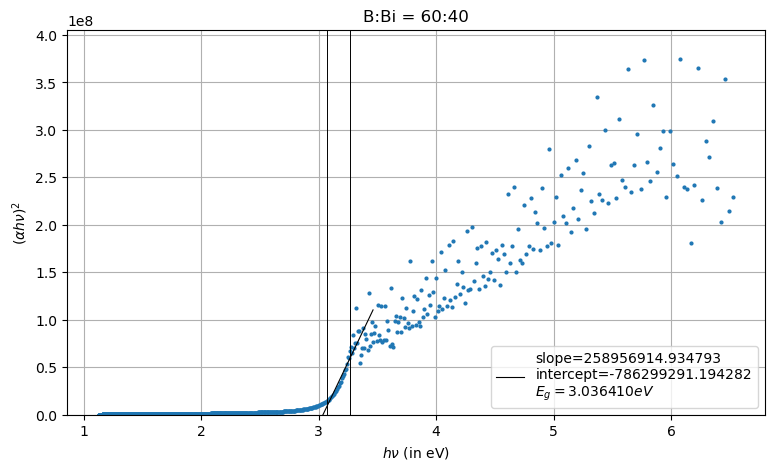

In [10]:
xt = 1.34e-3
ahv = (y6040*h*c/(xt*x6040*1e-9*e))**(2)
hv = h*c/(x6040*1e-9*e)
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
plt.title('B:Bi = 60:40')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
slope2.append(popt[0]), intercept2.append(popt[1]), Eg_2.append(abs(popt[1]/popt[0]))
c1err.append(pcov[1][1]), c2err.append(pcov[0][0])
vp1 = np.linspace(vp.min()-10e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('6040p', dpi=300)
plt.show()

In [11]:

df1 = pd.DataFrame({
'Sample':['B:Bi = 25:75', 'B:Bi = 45:55', 'B:Bi = 60:40'],
'Wavelength':lam_p, 'Band gap':Eg_1
})
df2 = pd.DataFrame({
'Sample':['B:Bi = 25:75', 'B:Bi = 45:55', 'B:Bi = 60:40'],
'Intercept':intercept2, 'Slope':slope2, 'Band gap':Eg_2
})
display(df1)
df1.to_excel('uv_calculations1.xlsx', sheet_name='method 1')
display(df2)
df2.to_excel('uv_calculations2.xlsx', sheet_name='method 2')
dlam = 1e-9*np.array([1,1,1])
errEg = dlam/lam_p
df3 = pd.DataFrame({
'Sample':['B:Bi = 25:75', 'B:Bi = 45:55', 'B:Bi = 60:40'],
'Wavelength':lam_p, 'd lam':dlam, 'Band gap':Eg_1, 'd Eg/ Eg in \%': 100*errEg
})
display(df3)
df3.to_excel('uv_calculations3.xlsx')
c1e, c2e = np.array(c1err)**0.5, np.array(c2err)**0.5
slope2, intercept2 = np.array(slope2), np.array(intercept2)
errEg = abs(c1e/intercept2) + abs(c2e/slope2)
df4 = pd.DataFrame({
'Sample':['B:Bi = 25:75', 'B:Bi = 45:55', 'B:Bi = 60:40'],
'c1':intercept2, 'd c1':c1e, 'c2':slope2, 'd c2':c2e,
'Band gap':Eg_2, 'd Eg/ Eg in \%': 100*errEg
})
display(df4)
df4.to_excel('uv_calculations4.xlsx')

,Sample,Wavelength,Band gap
0,B:Bi = 25:75,4.941783e-07,2.508896
1,B:Bi = 45:55,4.621936e-07,2.682517
2,B:Bi = 60:40,4.256989e-07,2.912486


,Sample,Intercept,Slope,Band gap
0,B:Bi = 25:75,-9.106523e+08,3.448618e+08,2.640630
1,B:Bi = 45:55,-1.431147e+09,5.055500e+08,2.830871
2,B:Bi = 60:40,-7.862993e+08,2.589569e+08,3.036410


,Sample,Wavelength,d lam,Band gap,d Eg/ Eg in \%
0,B:Bi = 25:75,4.941783e-07,1.000000e-09,2.508896,0.202356
1,B:Bi = 45:55,4.621936e-07,1.000000e-09,2.682517,0.216360
2,B:Bi = 60:40,4.256989e-07,1.000000e-09,2.912486,0.234908


,Sample,c1,d c1,c2,d c2,Band gap,d Eg/ Eg in \%
0,B:Bi = 25:75,-9.106523e+08,4.820088e+07,3.448618e+08,1.736454e+07,2.640630,10.328223
1,B:Bi = 45:55,-1.431147e+09,7.304755e+07,5.055500e+08,2.446606e+07,2.830871,9.943620
2,B:Bi = 60:40,-7.862993e+08,4.325892e+07,2.589569e+08,1.367020e+07,3.036410,10.780533


### GLASS

,WL(nm),Abs,T%
0,190,2.3452,0.45
1,191,3.8732,0.01
2,192,2.5825,0.26
3,193,3.0152,0.10
4,194,2.7841,0.16


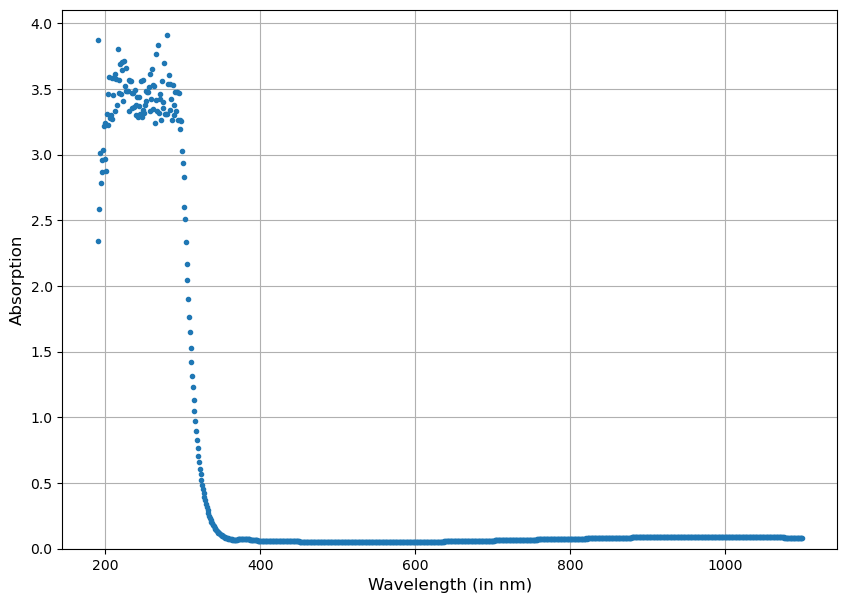

In [12]:
df = pd.read_excel('UV.xlsx', sheet_name='GLASS')
display(df.head())
xg = df['WL(nm)'].to_numpy()
yg = df['Abs'].to_numpy()

plt.figure(figsize=(10,7))
plt.plot(xg, yg, 'o', ms=3)
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
# plt.title('GLASS')
plt.ylim(0,)
plt.grid()
# plt.savefig('GLASS', dpi=300)
plt.show()

min: 3.8266727911481553 and max: 4.160543571583902

slope=493.5693345369605 and intercept=-1914.6133422128878
Eg = 3.879117295666418 eV


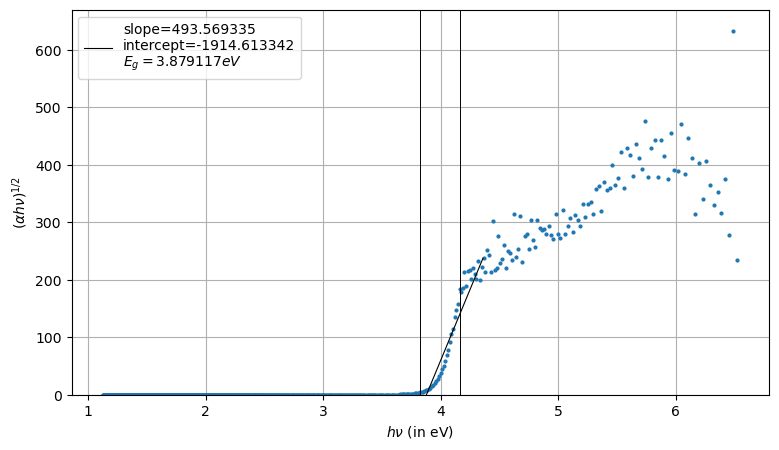

In [13]:
ahv = (yg*h*c/(xg*1e-9*e))**(2)
hv = h*c/(xg*1e-9*e)
i1, i2 = 108, 135
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
# plt.title('GLASS')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{1/2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e2, -1e3])
vp1 = np.linspace(vp.min()-2e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('GLASSp', dpi=300)
plt.show()

### AL1

,WL(nm),Abs,T%
0,190,3.1105,0.08
1,191,3.0262,0.09
2,192,3.9032,0.01
3,193,2.9721,0.11
4,194,3.2406,0.06


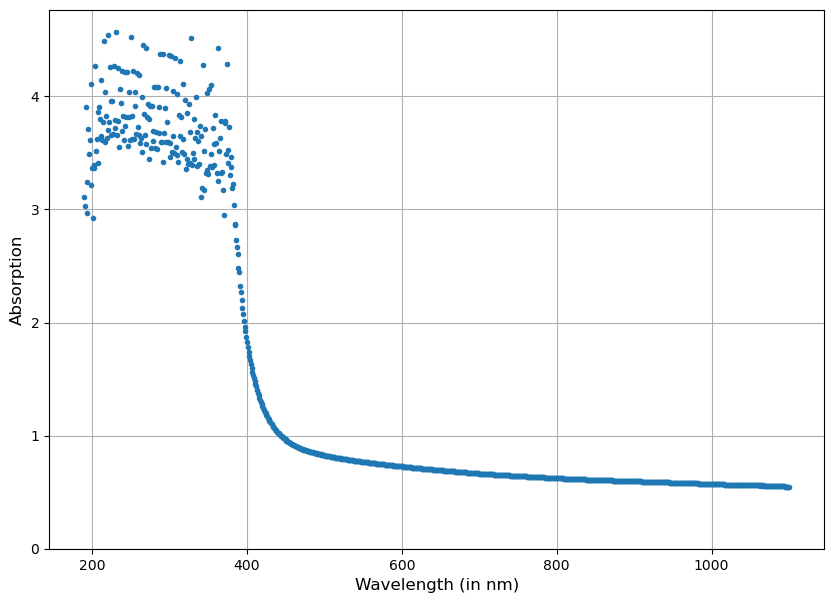

In [14]:
df = pd.read_excel('UV.xlsx', sheet_name='AL1')
display(df.head())
xal1 = df['WL(nm)'].to_numpy()
yal1 = df['Abs'].to_numpy()

plt.figure(figsize=(10,7))
plt.plot(xal1, yal1, 'o', ms=3)
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
# plt.title('AL1')
plt.ylim(0,)
plt.grid()
# plt.savefig('AL1', dpi=300)
plt.show()


min: 3.107373394315796 and max: 3.315085519604285

slope=639.6840095850713 and intercept=-1968.272369244478
Eg = 3.076944772343443 eV


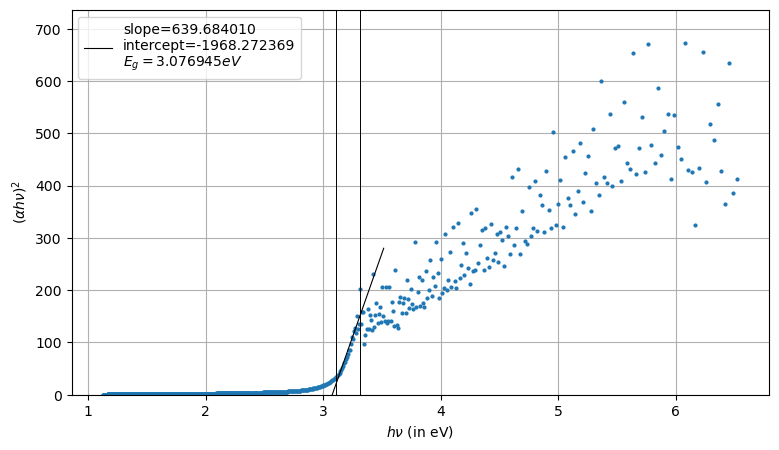

In [15]:
ahv = (yal1*h*c/(xal1*1e-9*e))**(2)
hv = h*c/(xal1*1e-9*e)
i1, i2 = 184, 210
vp, ap = hv[i1:i2], ahv[i1:i2]
# print(vp)
plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
# plt.title('AL1')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e2, -1e3])
vp1 = np.linspace(vp.min()-10e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'\nmin: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('AL1p', dpi=300)
plt.show()

### AL2

,WL(nm),Abs,T%
0,190,3.0756,0.08
1,191,2.9031,0.12
2,192,3.2515,0.06
3,193,2.7034,0.20
4,194,3.3383,0.05


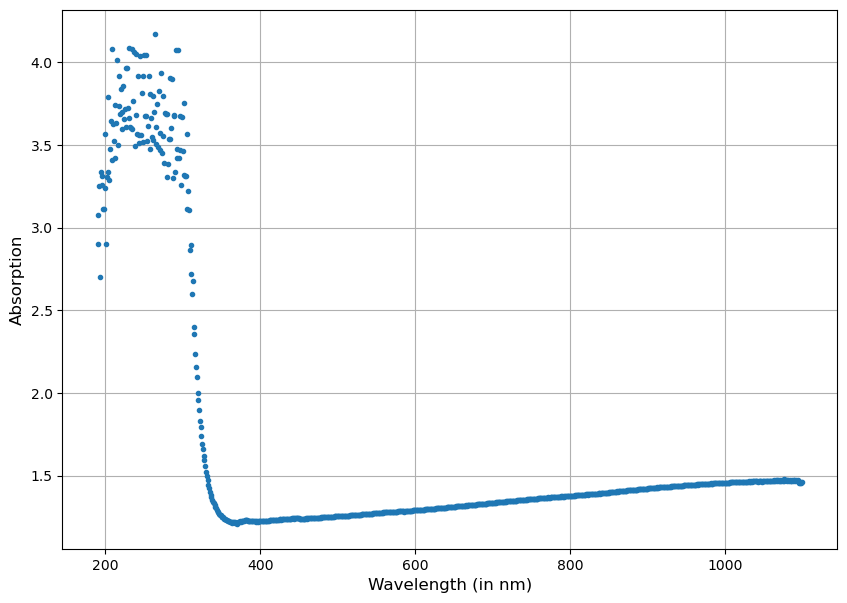

In [16]:
df = pd.read_excel('UV.xlsx', sheet_name='AL2')
display(df.head())
xal2 = df['WL(nm)'].to_numpy()
yal2 = df['Abs'].to_numpy()

plt.figure(figsize=(10,7))
plt.plot(xal2, yal2, 'o', ms=3)
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
# plt.title('AL2')
plt.grid()
# plt.savefig('AL2', dpi=300)
plt.show()

[4.06505569 4.05177119 4.03857324 4.02546099 4.01243361 3.99949027
 3.98663017 3.97385251 3.9611565  3.94854135 3.9360063  3.92355058
 3.91117345 3.89887416 3.88665199 3.8745062  3.86243609 3.85044095
 3.83852008 3.82667279]

min: 3.8266727911481553 and max: 4.065055686334435

slope=620.3002198780856 and intercept=-2346.1287855989367
Eg = 3.7822472254806665 eV


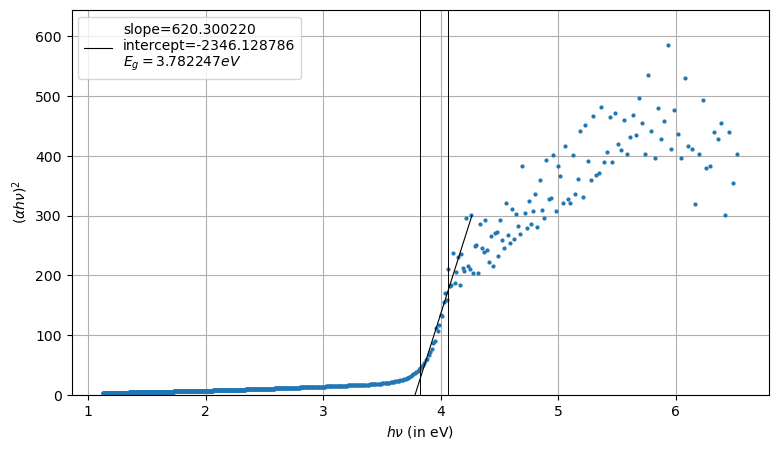

In [17]:
ahv = (yal2*h*c/(xal2*1e-9*e))**(2)
hv = h*c/(xal2*1e-9*e)
i1, i2 = 115, 135
vp, ap = hv[i1:i2], ahv[i1:i2]
print(vp)
plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
# plt.title('AL2')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
vp1 = np.linspace(vp.min()-10e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'\nmin: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('AL2p', dpi=300)
plt.show()

### AL3

,WL(nm),Abs,T%
0,190,2.4144,0.39
1,191,3.6513,0.02
2,192,2.6495,0.22
3,193,3.3162,0.05
4,194,2.8377,0.15


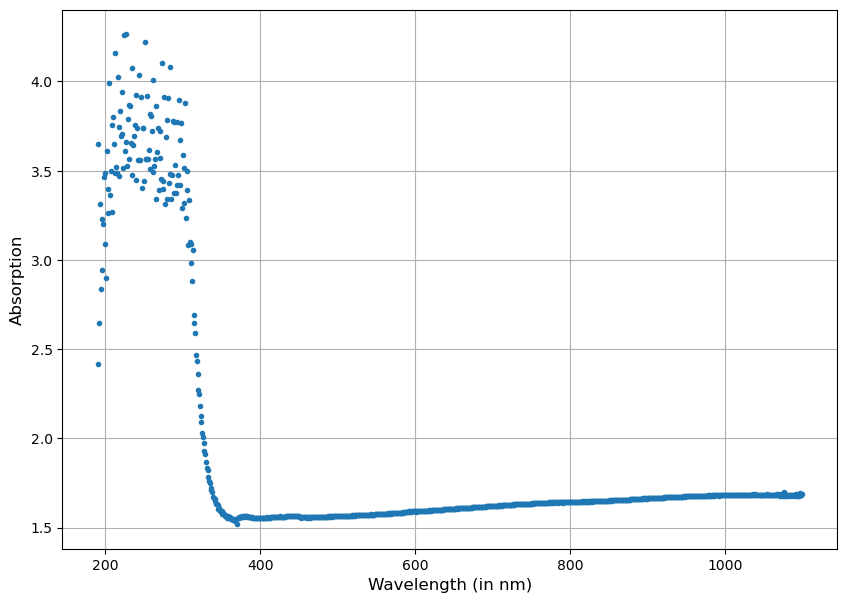

In [18]:
df = pd.read_excel('UV.xlsx', sheet_name='AL3')
display(df.head())
xal3 = df['WL(nm)'].to_numpy()
yal3 = df['Abs'].to_numpy()

plt.figure(figsize=(10,7))
plt.plot(xal3, yal3, 'o', ms=3)
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
# plt.title('AL3')
plt.grid()
# plt.savefig('AL3', dpi=300)
plt.show()

[4.06505569 4.05177119 4.03857324 4.02546099 4.01243361 3.99949027
 3.98663017 3.97385251 3.9611565  3.94854135 3.9360063  3.92355058
 3.91117345 3.89887416 3.88665199 3.8745062  3.86243609 3.85044095
 3.83852008 3.82667279 3.81489841 3.80319627 3.7915657  3.78000605
 3.76851667]

min: 3.768516669702136 and max: 4.065055686334435

slope=496.1381812410528 and intercept=-1834.3442763395249
Eg = 3.6972447307946528 eV


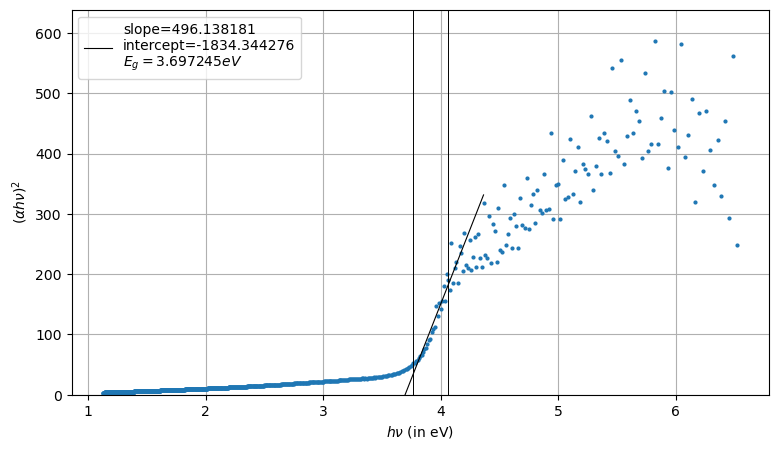

In [19]:
ahv = (yal3*h*c/(xal3*1e-9*e))**(2)
hv = h*c/(xal3*1e-9*e)
i1, i2 = 115, 140
vp, ap = hv[i1:i2], ahv[i1:i2]
print(vp)
plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
# plt.title('AL3')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
vp1 = np.linspace(vp.min()-10e-1, vp.max()+3e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'\nmin: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('AL3p', dpi=300)
plt.show()

### Thickness measurement

,Wavelength,Skin depth,Absorbance of glass,Absorbance of Al coated glass,Absorbance of Al film,Thickness
0,4.000000e-07,3.072122e-09,0.0617,1.5533,1.4916,4.582377e-09
1,6.000000e-07,3.762566e-09,0.0515,1.5905,1.5390,5.790588e-09
2,8.000000e-07,4.344637e-09,0.0749,1.6437,1.5688,6.815866e-09


Average thickness: 5.729610444122072e-09


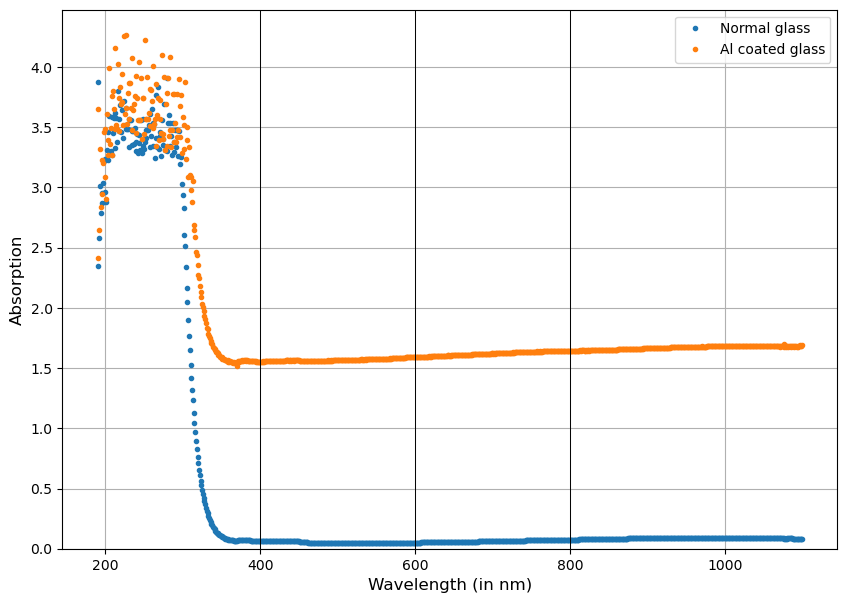

In [20]:
ivals = [210, 410, 610]
lams = np.array([400, 600, 800])*1e-9
rhoval, muval = 2.8e-8, 1.26e-6
delvals = np.sqrt(rhoval*lams/(np.pi*c*muval))
ags = np.array([yg[i] for i in ivals])
aal1s = np.array([yal3[i] for i in ivals])
adiffs = aal1s - ags
ts = adiffs*delvals
df = pd.DataFrame({
'Wavelength':lams, 'Skin depth':delvals, 'Absorbance of glass':ags,
'Absorbance of Al coated glass':aal1s, 'Absorbance of Al film': adiffs,
'Thickness':ts
})
display(df)
df.to_excel('uv_calculations5.xlsx', sheet_name='thickness')
print(f'Average thickness: {np.mean(ts)}')
plt.figure(figsize=(10,7))
plt.plot(xg, yg, 'o', ms=3, label='Normal glass')
plt.plot(xal3, yal3, 'o', ms=3, label='Al coated glass')
plt.axvline(400, color='black', lw=0.7)
plt.axvline(600, color='black', lw=0.7)
plt.axvline(800, color='black', lw=0.7)
# plt.axvline(1000, color='black', lw=0.7)

plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
plt.savefig('thickness', dpi=300)
plt.show()

## Other Data

### 35 65

,WL(nm),Abs,T%
0,190,3.4529,0.04
1,191,3.0262,0.09
2,192,3.1629,0.07
3,193,2.7705,0.17
4,194,3.2705,0.05


min: 420 and max: 454

slope=-0.014596022366212831 and intercept=7.380136059749293


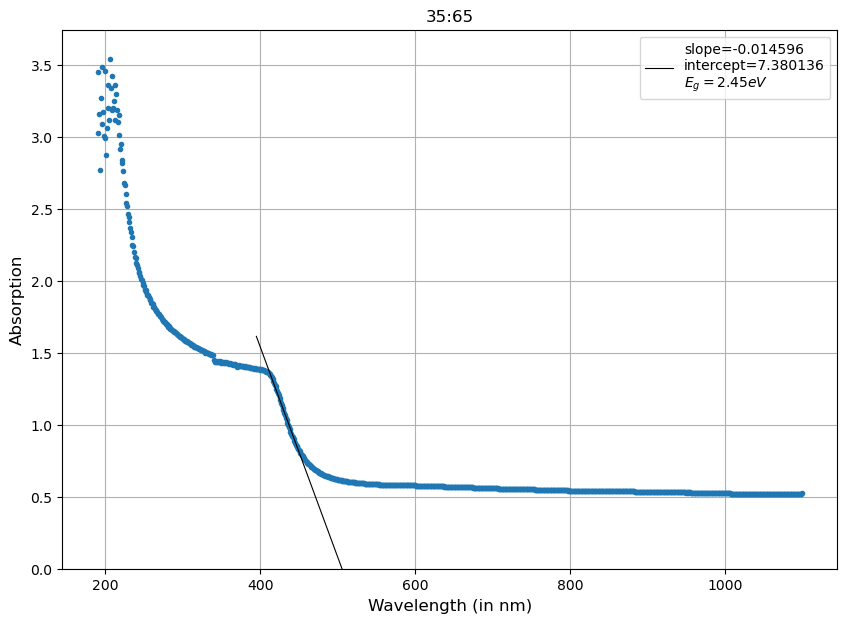

In [21]:
df = pd.read_excel('UV.xlsx', sheet_name='3565')
display(df.head())
x3565 = df['WL(nm)'].to_numpy()
y3565 = df['Abs'].to_numpy()
i1, i2 = 230, 265
xp, yp = x3565[i1:i2], y3565[i1:i2]

popt, pcov = curve_fit(linfit, xp, yp, p0=[0.05, 10])
xp1 = np.linspace(xp.min()-25, xp.max()+90, 50)
yfit = popt[0]*xp1 + popt[1]
lam = abs(popt[1]/popt[0])/(1e9)
Egdirect = h*c/(lam*e)
print(f'min: {xp.min()} and max: {xp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')

plt.figure(figsize=(10,7))
plt.plot(x3565, y3565, 'o', ms=3)
plt.plot(xp1, yfit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={Egdirect:.3}eV$')
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.title('35:65')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('3565', dpi=300)
plt.show()

min: 2.730929480907495 and max: 2.9520047246000067

slope=111799984.56019314 and intercept=-295568421.3509649
Eg = 2.643725064128527 eV


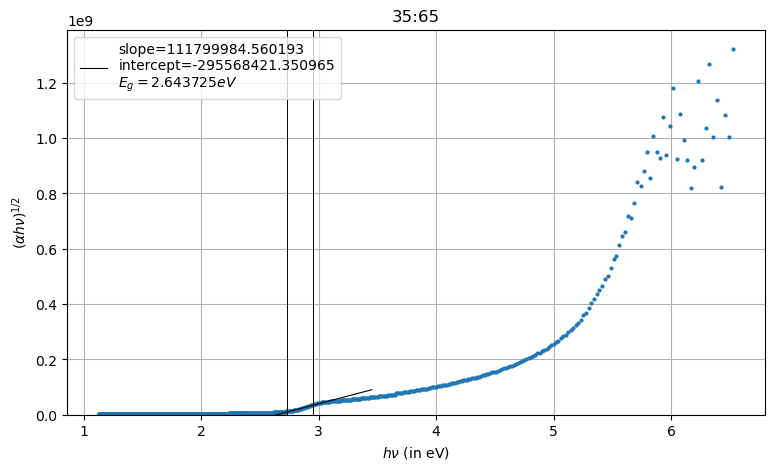

In [22]:
xt = 0.62e-3
ahv = (y3565*h*c/(xt*x3565*1e-9*e))**(2)
hv = h*c/(x3565*1e-9*e)
i1, i2 = 230, 265
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
plt.title('35:65')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{1/2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
vp1 = np.linspace(vp.min()-10e-1, vp.max()+5e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('3565p', dpi=300)
plt.show()

### 55 45

,WL(nm),Abs,T%
0,190,3.3067,0.05
1,191,4.3485,0.00
2,192,2.8425,0.14
3,193,3.2006,0.06
4,194,3.3753,0.04


min: 331 and max: 354

slope=-0.06597104333099985 and intercept=24.90360734086745


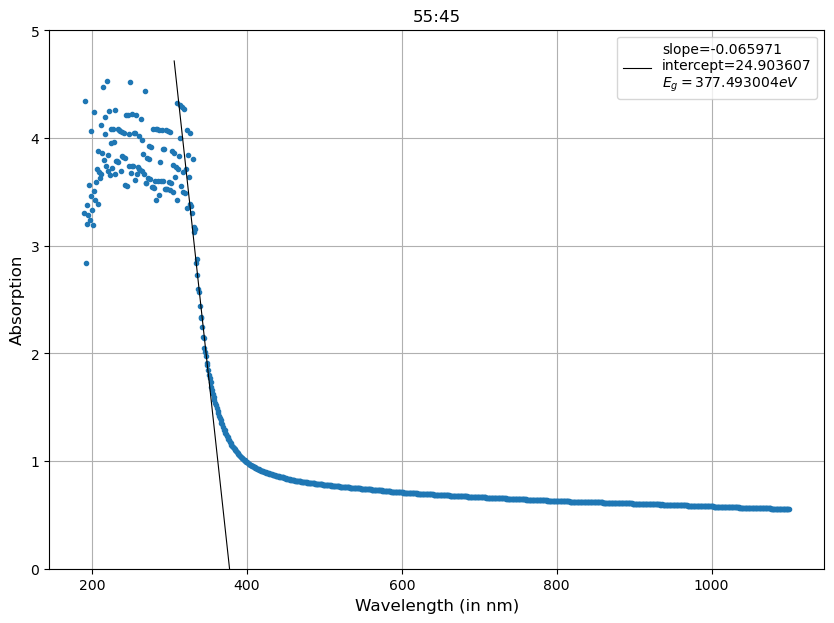

In [23]:
df = pd.read_excel('UV.xlsx', sheet_name='5545')
display(df.head())
x5545 = df['WL(nm)'].to_numpy()
y5545 = df['Abs'].to_numpy()
i1, i2 = 141, 165
xp, yp = x5545[i1:i2], y5545[i1:i2]

popt, pcov = curve_fit(linfit, xp, yp, p0=[0.05, 10])
xp1 = np.linspace(xp.min()-25, xp.max()+40, 50)
yfit = popt[0]*xp1 + popt[1]
lam = abs(popt[1]/popt[0])/(1e9)
Egdirect = h*c/(lam*e)
print(f'min: {xp.min()} and max: {xp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')

plt.figure(figsize=(10,7))
plt.plot(x5545, y5545, 'o', ms=3)
plt.plot(xp1, yfit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
plt.xlabel('Wavelength (in nm)', size=12)
plt.ylabel('Absorption', size=12)
plt.title('55:45')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('5545', dpi=300)
plt.show()

min: 3.5023784868135666 and max: 3.7457461762296145

slope=819917237.0470724 and intercept=-2830546665.571984
Eg = 3.452234613052145 eV


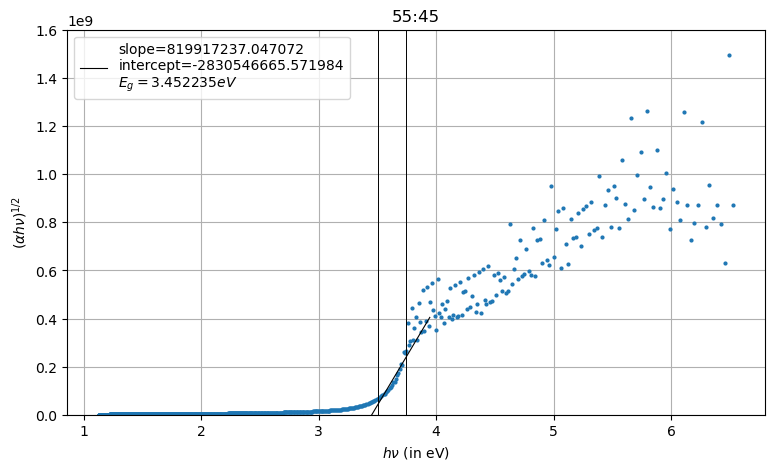

In [24]:
xt = 0.73e-3
ahv = (y5545*h*c/(xt*x5545*1e-9*e))**(2)
hv = h*c/(x5545*1e-9*e)
vp, ap = hv[i1:i2], ahv[i1:i2]

plt.figure(figsize=(9,5))
plt.plot(hv, ahv, 'o', ms=2)
plt.axvline(vp.min(), color='black', lw=0.7)
plt.axvline(vp.max(), color='black', lw=0.7)
plt.title('55:45')
plt.xlabel('$h\\nu$ (in eV)')
plt.ylabel('$(\\alpha h\\nu)^{1/2}$')

popt, pcov = curve_fit(linfit, vp, ap, p0=[5e8, -1e9])
vp1 = np.linspace(vp.min()-8e-1, vp.max()+2e-1, 50)
afit = popt[0]*vp1 + popt[1]
# plt.scatter(vp, ap)
plt.plot(vp1, afit, 'black', lw=0.8, 
        label=f'slope={popt[0]:3f}\nintercept={popt[1]:3f}\n$E_g={abs(popt[1]/popt[0]):3f}eV$')
print(f'min: {vp.min()} and max: {vp.max()}')
print(f'\nslope={popt[0]} and intercept={popt[1]}')
print(f'Eg = {np.abs(popt[1]/popt[0])} eV')
plt.ylim(0,)
plt.grid()
plt.legend(loc='best')
# plt.savefig('5545p', dpi=300)
plt.show()